# Introduction to unsupervised learning 

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.


## Setup: 
Here we will load necessary libraries (NumPy, Pandas and loading and visualising MNIST handwritten digits)

In [ ]:
# The three giants on which everything else is built
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# We don't like warnings
import warnings
warnings.filterwarnings('ignore')

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

from tensorflow.keras.datasets import mnist

# Curse of dimensionality (part I)
Distances in high dimensional spaces become more similar (MNIST example)

In [ ]:
# exactly the same as in previous practice session
(images, labels), _ = mnist.load_data()

# reshaping each image 28x28 into a vector of 784 values
# needed for the scikit learn to work properly
images = images.reshape(images.shape[0], images.shape[1] * images.shape[2])

print(f"images are of shape: {images.shape} and labels: {labels.shape}")

11501568/11490434 [==============================] - 0s 0us/step
images are of shape: (60000, 784) and labels: (60000,)


Taking a subsample again, just to make things run a bit faster

In [ ]:
train_images = images[:2000]
train_labels = labels[:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

In [ ]:
train_images.dtype

dtype('uint8')

Normalization will convert our images to float

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
# function from the previous practice session
# finds euclidean distance between two images
def dist(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

In [ ]:
dist(train_images[0], train_images[1])

9.361222132577327

Let's calculate euclidean distances between all images in the training data using `dist()` function by running the following cell.

In [ ]:
%%time
# Initialize the matrix with zeros
distance_matrix = np.zeros((len(train_images), len(train_images)))

##### YOUR CODE STARTS #####
for i in range(len(train_images)):
  for j in range(len(train_images)):
    if i == j:
      distance_matrix[i, j] = float('inf') # to make sure that images are not the closest to themselves
    else:
      distance_matrix[i, j] = dist(train_images[i], train_images[j])
##### YOUR CODE ENDS ##### 


CPU times: user 32.8 s, sys: 198 ms, total: 33 s
Wall time: 33.1 s


In [ ]:
print(distance_matrix[:5, :5])

[[        inf  9.36122213 10.87509456 10.01890101 10.48026358]
 [ 9.36122213         inf 11.36836434 10.84912291 10.36724725]
 [10.87509456 11.36836434         inf 10.08471308 10.05302283]
 [10.01890101 10.84912291 10.08471308         inf  9.36790844]
 [10.48026358 10.36724725 10.05302283  9.36790844         inf]]


<font color=green size=4>**Question**: Why this matrix is symmetric?
</font>

NumPy has a function `np.linalg.norm()` that can help calculate eucledian distance between images. More information about the function can be found here: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html. This function is a lot more efficient than our own code and also we are lazy :)

In [ ]:
np.linalg.norm(train_images[0] - train_images[1])

9.361222132577327

Let's calculate euclidean distances between all images in the training data and store them in a matrix using `np.linalg.norm()` function. Let's measure the execution time using `time` library.

In [ ]:
# This is how you can measure execution time of the function
import time
# we start the stopwatch
start_time = time.time()

# compute L2 norm on difference between every image and the rest of the images
distance_matrix = np.array([np.linalg.norm(image - train_images[:], axis=1) for image in train_images])

# force the values on the main diagonal to be inf
distance_matrix[np.diag_indices(distance_matrix.shape[0])] = float('inf')

# we stop the stopwatch
end_time = time.time()

print(f"--- {end_time - start_time} seconds ---")

--- 7.422588109970093 seconds ---


In [ ]:
print(distance_matrix[:5, :5])

[[        inf  9.36122213 10.87509456 10.01890101 10.48026358]
 [ 9.36122213         inf 11.36836434 10.84912291 10.36724725]
 [10.87509456 11.36836434         inf 10.08471308 10.05302283]
 [10.01890101 10.84912291 10.08471308         inf  9.36790844]
 [10.48026358 10.36724725 10.05302283  9.36790844         inf]]


Here comes weirdly looking and hard to understand code that takes a random image from `train_images` and prints out a series of images in which every next image is closes to the previous image in the euclidean space.

In [ ]:
plt.rcParams['figure.figsize'] = (24.0, 12.0) # set default size of plots

# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_random_sequence(start_id):
  print(start_id)
  n_images = 30

  plt.subplot(1, 1, 1)
  plt.imshow(train_images[start_id].reshape((28, 28)), plt.get_cmap('gray'))
  plt.axis('off')

  curr_id = start_id
  idx = np.zeros(n_images)
  idx[0] = curr_id
  new_id = -1

  for i in (np.arange(1, n_images)):
    plt_idx = i
    plt.subplot(1, n_images, (plt_idx + 1))
    closest_idx = np.argsort(distance_matrix[:,curr_id].flatten())
    
    for j in closest_idx:
      if not j in idx:
        new_id = j
        break
    
    if new_id == -1:
      break

    plt.imshow(train_images[new_id].reshape((28, 28)), plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(train_labels[new_id])
    curr_id = new_id
    idx[i] = curr_id
    new_id = -1

  plt.show()

Play around with the output by re-running this cell miltiple times.

2


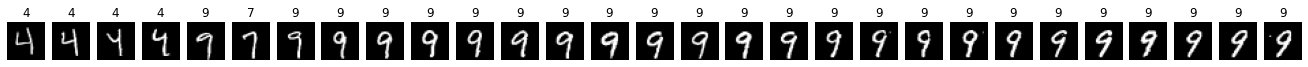

In [ ]:
##### YOUR CODE STARTS #####
start_id = 2 # 31, 2  are interesting cases
##### YOUR CODE ENDS ##### 
plot_random_sequence(start_id)

Next we can see couple of images that are on the equal distances from the original image in the euclidean space

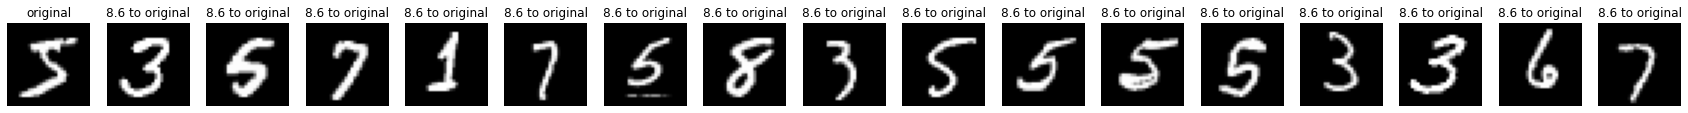

In [ ]:
distance = 8.6
ids = np.append(np.array(0), np.flatnonzero(np.round(distance_matrix[0,:], 1) == distance))

plt.rcParams['figure.figsize'] = (30, 4) # set default size of plots

for i in np.arange(len(ids)):
  plt_idx = i
  plt.subplot(1, len(ids), plt_idx + 1)
  plt.imshow(train_images[ids[i]].reshape((28, 28)), plt.get_cmap('gray'))
  plt.axis('off')
  if i == 0:
    plt.title("original")
  else: 
    plt.title(str(np.round(np.linalg.norm(train_images[0] - train_images[ids[i]]), 1)) + " to original")

plt.show()

# Curse of dimensionality (part II)
Here we will illustrate how increasing the dimensionality of your data (adding more features) may impact the performance of the machine learning model.

We generate 100 points from 50 dimensional Gaussian distribution. Fifty points are generated from a distribution centered at 1 and another fifty from a distribution with a centre in 0.

Here is how these two Gaussians look like in 1D: 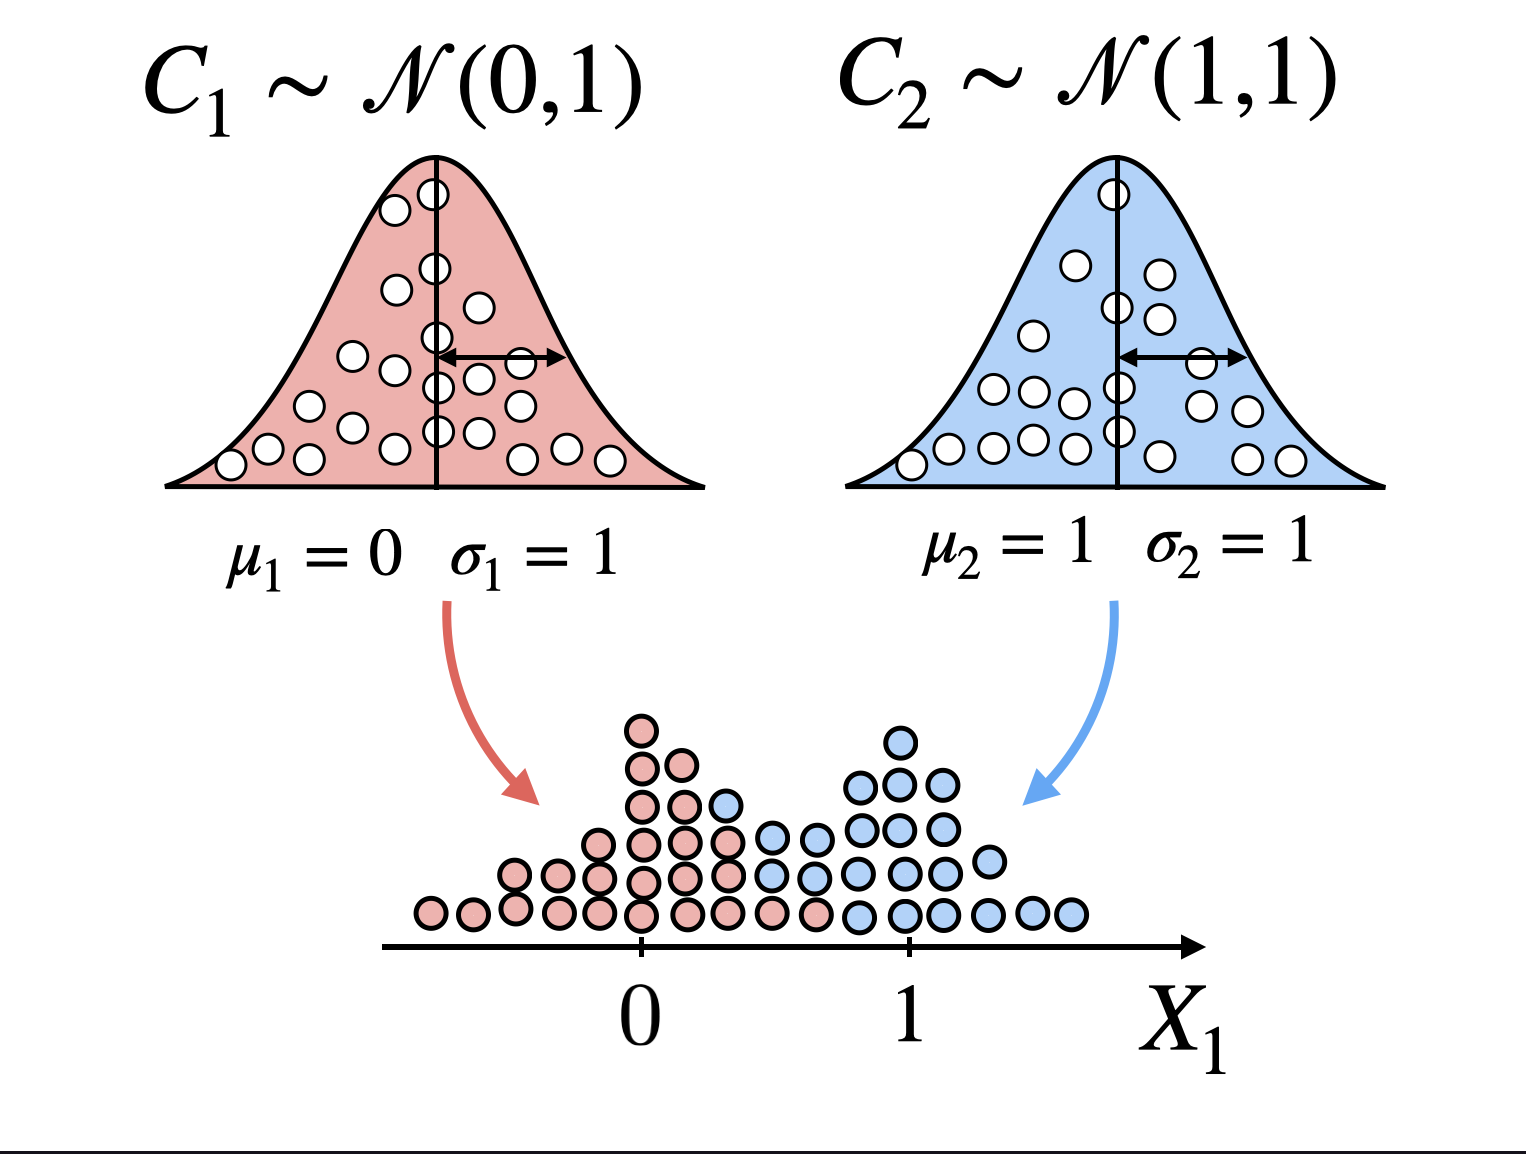

In [ ]:
np.random.seed(2342347823) # random seed for consistency

D = 50
num_points = 50

# Generating 50 points for the first class
mu_vec1 = np.zeros(D) 
cov_mat1 = np.eye(D) # creates a diagonal matrix of size D x D, all values except diagonal are 0
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, num_points)

# Generating 50 points for the second class
mu_vec2 = np.ones(D) # this is the only difference with the previous matrix
cov_mat2 = np.eye(D)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, num_points)

In [ ]:
print(class1_sample.shape)
print(class2_sample.shape)

(50, 50)
(50, 50)


Combine two samples together into one dataset

In [ ]:
data = np.concatenate((class1_sample, class2_sample), axis=0)
train_data = pd.DataFrame(data)
train_data.shape

(100, 50)

In [ ]:
# Create names for columns, x1, x2 ... x50
train_data.columns = ['x' + str(i) for i in np.arange(D) + 1]
train_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,0.747677,-1.607201,1.522674,-0.319540,0.752203,1.557956,-0.463461,-0.669275,0.473778,0.739542,...,-1.572992,-1.441759,-0.459967,-0.751401,-0.806643,-0.859542,-0.349027,-0.251280,0.633352,-0.399698
1,1.219613,0.868021,-0.619240,0.351791,1.201451,0.062275,1.210506,-0.303558,0.882985,0.044489,...,0.320224,1.343128,-1.106933,-0.085820,0.547569,-0.494705,0.956354,-0.932077,-0.460074,-0.788092
2,-1.195929,-0.774669,0.696410,1.061209,-0.410439,-0.008696,0.564533,0.350594,-1.116167,-0.318810,...,-0.660793,0.263611,-1.717626,-0.185739,-0.560680,-0.498485,-0.532319,-0.995843,-0.909416,-1.416558
3,0.264414,0.112681,0.192169,0.355585,-0.865096,0.318052,0.006032,-0.061810,-2.095889,-0.418547,...,-2.324148,-0.083450,0.167278,-2.786565,1.894240,0.738902,-1.656709,-0.621922,-0.267875,0.427367
4,1.120413,-1.095159,0.204777,-0.138254,0.880851,0.210507,-0.123610,0.493870,0.611769,0.250134,...,-1.213437,0.146685,0.027748,2.054341,-0.230407,0.266749,0.903898,-0.066085,0.427149,-0.661240


In [ ]:
# Create a class column
train_data['class'] = np.concatenate((np.repeat(0, num_points), np.repeat(1, num_points)))

# Cast class variable into categorical 
# This is important for plotting and modelling
train_data['class'] = train_data['class'].astype('category')
train_data.loc[:,['x1','x2','class']].head()

,x1,x2,class
0,0.747677,-1.607201,0
1,1.219613,0.868021,0
2,-1.195929,-0.774669,0
3,0.264414,0.112681,0
4,1.120413,-1.095159,0


Let's take a look at the data we have generated (at least at its first two dimentions):

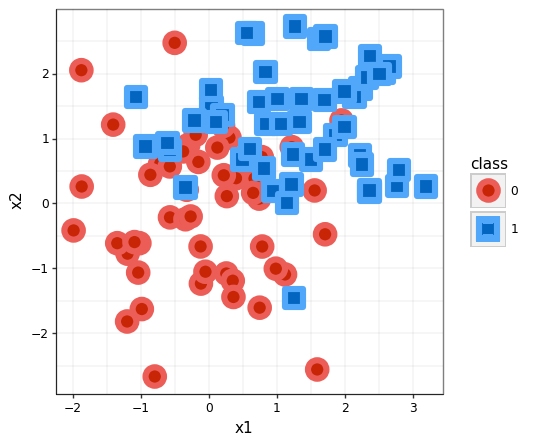

In [ ]:
fig = (
    ggplot(data = train_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          subplots_adjust = {'wspace': 0.08},
          axis_text = element_text(colour ='black'))
).draw()

Divide this dataset into two sets: training set (60%) and validation set (40%). As we have done in the previous practice.

In [ ]:
##### YOUR CODE STARTS #####
train = train_data[0:int(len(train_data)*0.6)]
val = train_data[int(len(train_data)*0.6):]
##### YOUR CODE ENDS ##### 

In [ ]:
print(train.shape)
print(val.shape)

(60, 51)
(40, 51)


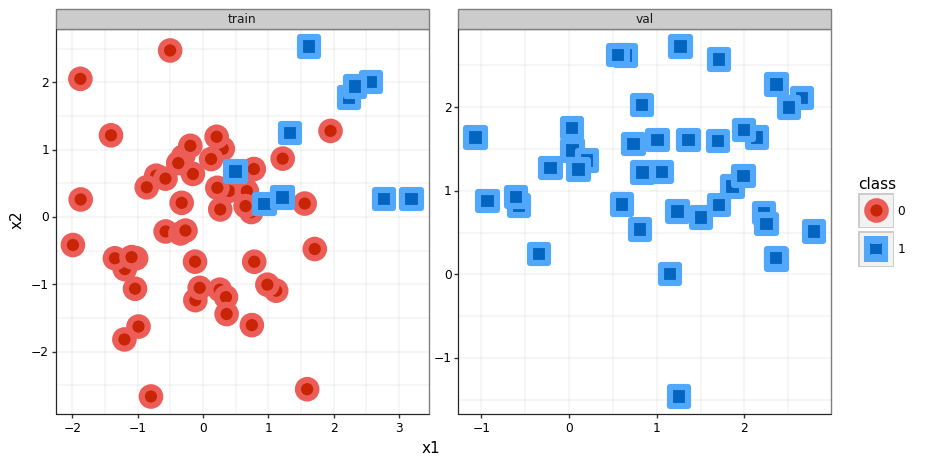

In [ ]:
# Let's visualise training and validation data
vis_data = train_data
vis_data['subset'] = 'train'
vis_data['subset'][int(len(train_data)*0.6):] = 'val'
vis_data['subset'] = vis_data['subset'].astype('category')

fig = (
    ggplot(data = vis_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    facet_wrap('~subset', scales = 'free', ) + 
    theme(figure_size = (10, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          subplots_adjust = {'wspace': 0.08},
          axis_text = element_text(colour ='black'))
).draw()

There are way more instances on the class 0 than instances of class 1. What is wrong?

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_data, test_size = 0.4, random_state = 111)

Visualise the training data again to make sure that now we managed to get balanced representation

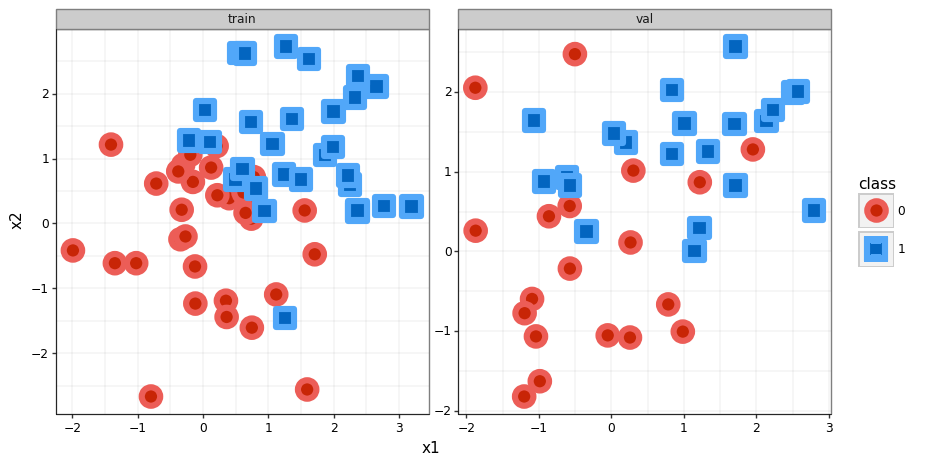

In [ ]:
# Let's visualise new training and validation data
train['subset'] = 'train'
val['subset'] = 'val'

vis_data = pd.concat([train, val])
vis_data['subset'] = vis_data['subset'].astype('category')

fig = (
    ggplot(data = vis_data,
          mapping = aes(x = 'x1', y = 'x2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x1',
        y = 'x2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    facet_wrap('~subset', scales = 'free', ) + 
    theme(figure_size = (10, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          subplots_adjust = {'wspace': 0.08},
          axis_text = element_text(colour ='black'))
).draw()

Well done!

Let's see how the Decision Tree algorithm can cope with this data. Let's import the Decision Tree (this time we will need classifier) from the `sklearn` package.


---


The **Decision Tree Classifier** is similar to the Decision Tree Regressor that we have seen in the previous sessions, except that instead of **MSE** it optimizes **accuracy** of the class assignment.

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Complete a function `train_and_evaluate_with_dim` that trains a DecisionTreeClassifier on `dim`-dimensional data and test it on validation data (*we shall not use CV algorithm in this case to save time*):

In [ ]:
def train_and_evaluate_with_dim(train, val, dim = 2):
  np.random.seed(1111)
  dtree = DecisionTreeClassifier(max_depth = 5)
  dtree.fit(train.iloc[:, :dim], y = train['class'])
  
  ##### YOUR CODE STARTS #####
  val_predict = dtree.predict(val.iloc[:, :dim])
  val_accuracy = np.mean(val_predict == val['class'])
  ##### YOUR CODE ENDS ##### 
  return val_accuracy

In [ ]:
dims = [2, 5, 50]
for dim in dims:
    print(f"Validation accuracy for {dim} features is {train_and_evaluate_with_dim(train, val, dim) * 100}%")

Validation accuracy for 2 features is 80.0%
Validation accuracy for 5 features is 72.5%
Validation accuracy for 50 features is 65.0%


<font color=green size=4>**Question**: What is going on here? Why fewer features result in better performance?
</font>

# Curse of dimensionality (part III)
The assumption is that under the curse of dimensionality the expected smallest distance between points increases (points in high-dimensional space are further apart) exponentially with number of dimensions. Here we will try to demonstrate this phenomenon experimentaly. 

Let's sample 14 points from 1D uniform distribution:


In [ ]:
np.random.seed(1111)
oneD = np.random.rand(14,1)*6 # samples from [0,6]
print(oneD)

[[0.5732952 ]
 [5.55002221]
 [2.06144054]
 [1.86286165]
 [0.01205904]
 [1.41356835]
 [1.42675032]
 [4.41549524]
 [2.97280846]
 [4.70655209]
 [0.75903787]
 [3.63989592]
 [2.79672585]
 [1.42279275]]


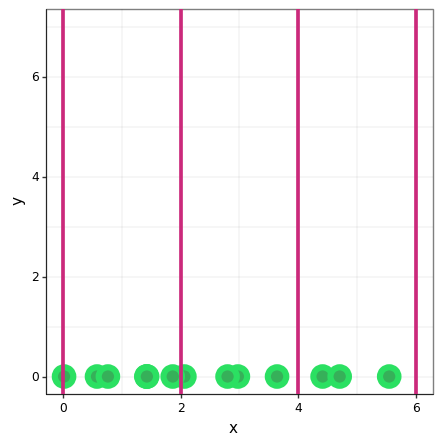

In [ ]:
# Converting oneD into pandas DataFrame before visualising
example_data = pd.DataFrame({'x':np.transpose(oneD)[0], 'y':np.zeros_like(np.transpose(oneD)[0])})

fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    geom_vline( xintercept = (0, 2, 4, 6), color="#CB297B", size=1.5) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

Again sampling 14 points, now from uniform 2D distribution

In [ ]:
np.random.seed(1111)
twoD = np.random.rand(14,2)*6

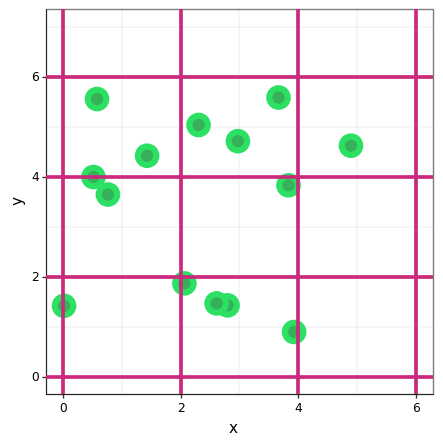

In [ ]:
example_data = pd.DataFrame({'x':np.transpose(twoD)[0], 'y':np.transpose(twoD)[1]})
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    geom_vline( xintercept = (0, 2, 4, 6), color="#CB297B", size=1.5) + 
    geom_hline( yintercept = (0, 2, 4, 6), color="#CB297B", size=1.5) +
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

<font color=green size=4>**Question**: What is the difference between 1D and 2D cases?
</font>

# Principle Component Analysis (toy data)

PCA is one of the most common ways to reduce the dimensionality of the data. Here we will examine ways to build a PCA for a given toy dataset. If you are still struggling with eigenvectors and values theory, you can enjoy [this video](https://youtu.be/PFDu9oVAE-g).

Let's review the steps of PCA from the lecture.
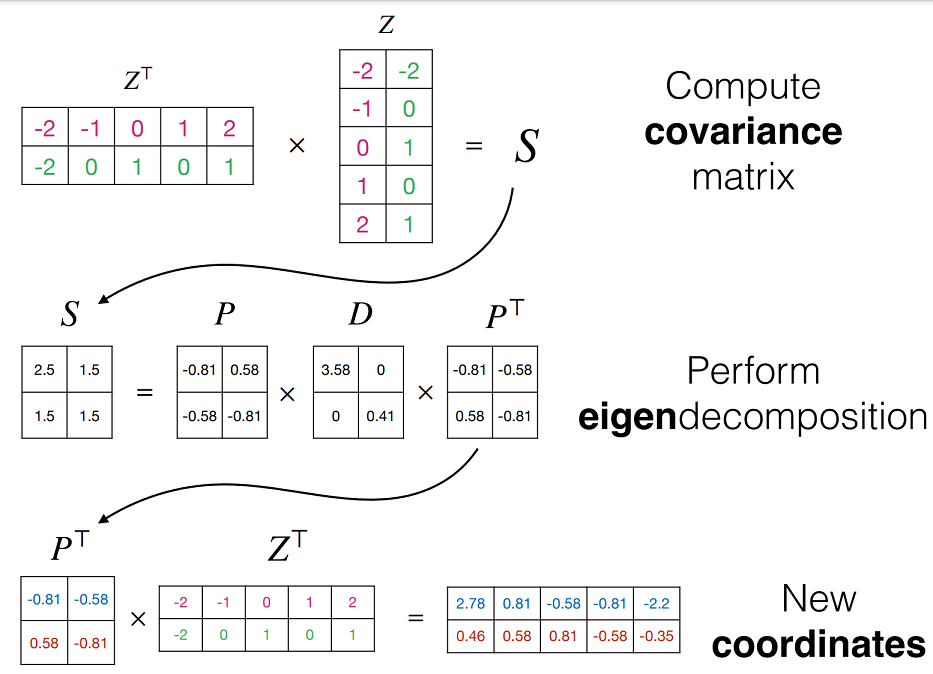


In [ ]:
# Let's generate data from the lecture slides
Z = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]})

# Centering both features
Z.x = Z.x - Z.x.mean()
Z.y = Z.y - Z.y.mean()

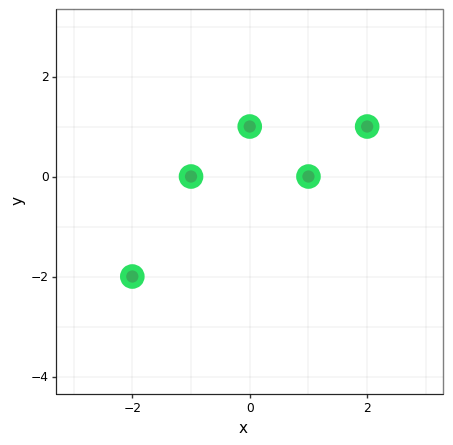

In [ ]:
fig = (
    ggplot(data = Z,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

Transpose the matrix of original coordinates

In [ ]:
Z = np.matrix(Z) 
Z_t = Z.T
print('Original matrix Z:')
print(Z)
print('Transposed matrix Z.T:')
print(Z_t)

Original matrix Z:
[[-2. -2.]
 [-1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 2.  1.]]
Transposed matrix Z.T:
[[-2. -1.  0.  1.  2.]
 [-2.  0.  1.  0.  1.]]


Compute [empirical covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix#Estimation) using the following formula: $$ S = \frac{1}{n - 1}Z^T Z $$
where $n$ is the number of observations.

In [ ]:
##### YOUR CODE STARTS #####
S = (Z_t @ Z)/(Z.shape[0] - 1) # divide by the (number of observations - 1)
##### YOUR CODE ENDS ##### 
print(S)

[[2.5 1.5]
 [1.5 1.5]]


Perform eigendecomposition using `linalg.eig` function from `numpy`

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(S)

print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors (in columns):")
print(eigenvectors)

Eigenvalues:
[3.58113883 0.41886117]
Eigenvectors (in columns):
[[ 0.81124219 -0.58471028]
 [ 0.58471028  0.81124219]]


Let's visualise eigenvectors to remind ourselves their purpose. To do so, we need to draw two lines (one per each eigenvector), so that each lines passes through the origin (0,0) and a point with corrdinates of the vect

In [ ]:
# Coordinates of the origin
x1 = 0
y1 = 0

# first vector
x2 = eigenvectors[0, 0]
y2 = eigenvectors[1, 0]
slope_1 = (y2 - y1) / (x2 - x1)
intercept_1 = y2 - slope_1 * x2 

# second vector
x2 = eigenvectors[0, 1]
y2 = eigenvectors[1, 1]
slope_2 = (y2 - y1)/(x2 - x1)
intercept_2 = y2 - slope_2 * x2 

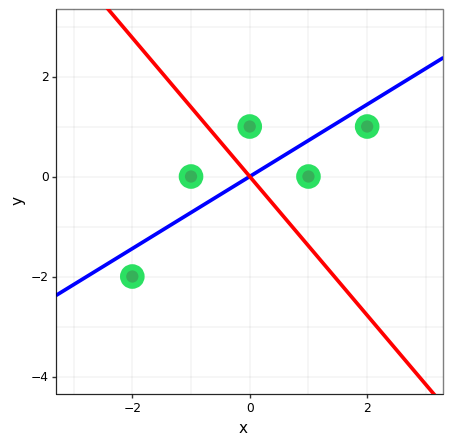

In [ ]:
fig = (
    ggplot(data = pd.DataFrame(Z, columns=['PC1', 'PC2']),
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    geom_abline(intercept=intercept_1, slope=slope_1, color="blue", size=1.5) + 
    geom_abline(intercept=intercept_2, slope=slope_2, color="red", size=1.5) + 
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

Transform transposed matrix of original coordinates into the space of principle components.

In [ ]:
Z_new = -eigenvectors.T @ Z_t 
# we multiple by -1 just to make results look exactly like in lecture :)

# Make it actually look nice
Z_new_pd = pd.DataFrame(Z_new.T, columns=['PC1', 'PC2'])
Z_new_pd

,PC1,PC2
0,2.791905,0.453064
1,0.811242,-0.584710
2,-0.584710,-0.811242
3,-0.811242,0.584710
4,-2.207195,0.358178


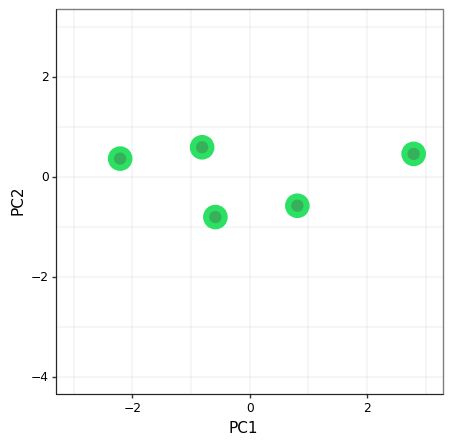

In [ ]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

## PCA with `sklearn`
Of course, you guessed it, `sklearn` can do it for you.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #choose the number of components = number of original dimensions

# use PCA on our data
pca.fit(Z) # Z has already been normalised

PCA(n_components=2)

In [ ]:
# btw how do we explore the object structure?
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random

In [ ]:
pca_eigenvectors = pca.components_

##### YOUR CODE STARTS #####
# extract eigenvalues from the pca object
pca_eigenvalues = pca.explained_variance_
##### YOUR CODE ENDS ##### 

print("Sklearn computed eigenvalues:")
print(pca_eigenvalues)
print("Sklearn computed eigenvectors (in rows):")
print(pca_eigenvectors)

Sklearn computed eigenvalues:
[3.58113883 0.41886117]
Sklearn computed eigenvectors (in rows):
[[-0.81124219 -0.58471028]
 [-0.58471028  0.81124219]]


Transform the original matrix with `sklearn` derived values:

In [ ]:
##### YOUR CODE STARTS #####
Z_new = pca_eigenvectors @ Z_t # note that here we don't need to transpose eigenvectors
##### YOUR CODE ENDS ##### 

Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2': -np.array(Z_new)[1]})
Z_new_pd

,PC1,PC2
0,2.791905,0.453064
1,0.811242,-0.584710
2,-0.584710,-0.811242
3,-0.811242,0.584710
4,-2.207195,0.358178


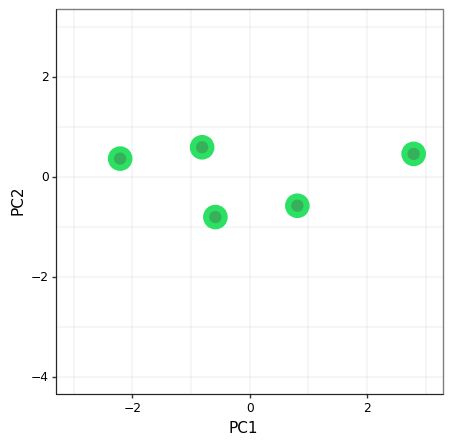

In [ ]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

## Shorter way to use PCA from `sklearn`

In [ ]:
pca = PCA(n_components=2)

# We `fit` PCA on our data
pca.fit(Z)

# Now we use it to transform any data, 
# including matrix it was fitted on
Z_new = pca.transform(Z).T

# Even shorter way that does not imply fitting PCA beforehand:
# pca.fit_transform(Z).T

That is it :)

In [ ]:
Z_new_pd = pd.DataFrame({'PC1':np.array(Z_new)[0], 'PC2': -np.array(Z_new)[1]})
Z_new_pd

,PC1,PC2
0,2.791905,0.453064
1,0.811242,-0.584710
2,-0.584710,-0.811242
3,-0.811242,0.584710
4,-2.207195,0.358178


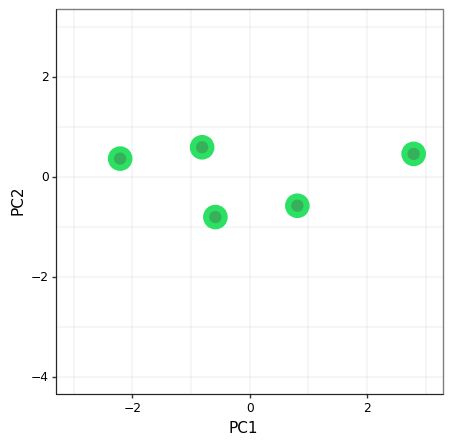

In [ ]:
fig = (
    ggplot(data = Z_new_pd,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    xlim(-3, 3) +
    ylim(-4, 3) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

# PCA can improve ML performance on high-dimensional data
Let's see how PCA can help us first to compress the original 50D data and secondly enable the Decision Tree algorithm perform better.

First, some simple preprocessing.


In [ ]:
# we need to drop class and subset variables (we will still have it stored in train)
train_Z = train.drop(['class','subset'], axis=1)

Here we will perform data standardisation which is an integral step in PCA as it helps us to make features with different variance comparable. Although in this case, we have features with equal variance, it still makes sense to start using the same toolkit as you would in real life. More information can be found in this [Sklearn documentation page](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).


In [ ]:
# Standardise data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # the same as centring but also divides by std

# Fit on training data ony
scaler.fit(train_Z)

# Apply the transform 
train_Z = scaler.transform(train_Z)

Let's do the PCA on training data

In [ ]:
pca_50D = PCA()

# 'fit' PCA on training data
pca_50D.fit(train_Z)

# Transform the original coordinates into PC space
train_Z_new = pca_50D.transform(train_Z).T

## Quantifying variance explained by PCs

Here, we will try to estimate the number of principle components that are needed to explain 90% of variance (retained information) in our data. Let's print out `explained_variance_` attribute of our `pca` object.

In [ ]:
print(np.round(pca_50D.explained_variance_, 3))

[10.72   2.913  2.712  2.368  2.198  2.122  2.014  1.824  1.735  1.665
  1.512  1.431  1.32   1.248  1.164  1.113  1.044  1.016  0.976  0.88
  0.86   0.728  0.669  0.628  0.578  0.546  0.537  0.472  0.43   0.42
  0.352  0.327  0.307  0.28   0.241  0.225  0.212  0.172  0.152  0.147
  0.131  0.112  0.082  0.077  0.06   0.037  0.031  0.03   0.015  0.012]


Here we can calculate the total of the variance explained by all PCs

In [ ]:
total_ev = np.sum(pca_50D.explained_variance_)
print(total_ev)

50.847457627118644


We can divide each value by the sum of all variances to figure out the ratios

In [ ]:
##### YOUR CODE STARTS #####
print(pca_50D.explained_variance_/total_ev)
##### YOUR CODE ENDS ##### 

[0.21083106 0.05728848 0.05333918 0.0465615  0.04322692 0.04172345
 0.03960806 0.03586656 0.03412022 0.0327542  0.02973294 0.02814138
 0.02596594 0.02454854 0.02289321 0.02189811 0.02054011 0.01998083
 0.01919294 0.01731363 0.01690847 0.01431158 0.01316034 0.01235555
 0.01137679 0.01074149 0.01057068 0.00929034 0.00846103 0.0082516
 0.00691798 0.00642313 0.00604281 0.00550046 0.00473738 0.00442278
 0.00417045 0.00339056 0.00299467 0.00289768 0.00258239 0.0021952
 0.00161131 0.00151559 0.00117885 0.00072752 0.00060655 0.00058605
 0.00030121 0.00024231]


Or we can use a handy attribute `explained_variance_ratio_` to avoid this pain.

In [ ]:
print((pca_50D.explained_variance_ratio_).round(3))

[0.211 0.057 0.053 0.047 0.043 0.042 0.04  0.036 0.034 0.033 0.03  0.028
 0.026 0.025 0.023 0.022 0.021 0.02  0.019 0.017 0.017 0.014 0.013 0.012
 0.011 0.011 0.011 0.009 0.008 0.008 0.007 0.006 0.006 0.006 0.005 0.004
 0.004 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.    0.   ]


How many PCs need to be retained in order to explain 90% or more variance of the original data?

In [ ]:
variances = pca_50D.explained_variance_ratio_

# Compute the array of total variances explained by 1, 2, 3, ... N components
cum_vars = np.array([(np.sum(variances[:i])) for i in np.arange(1, len(variances) + 1)])

print(np.round(cum_vars, 3))

[0.211 0.268 0.321 0.368 0.411 0.453 0.493 0.528 0.563 0.595 0.625 0.653
 0.679 0.704 0.727 0.748 0.769 0.789 0.808 0.826 0.842 0.857 0.87  0.882
 0.894 0.904 0.915 0.924 0.933 0.941 0.948 0.954 0.96  0.966 0.971 0.975
 0.979 0.983 0.986 0.988 0.991 0.993 0.995 0.996 0.998 0.998 0.999 0.999
 1.    1.   ]


In [ ]:
##### YOUR CODE STARTS #####
# Get the smallest number of PCs that explains at least 90% of variance
small_pc_num = np.min(np.where(cum_vars > 0.9)) + 1
##### YOUR CODE ENDS ##### 
print(f'The smallest number of PCs that explains more than 90% of variance is {small_pc_num} out of {len(pca_50D.explained_variance_ratio_)}')

The smallest number of PCs that explains more than 90% of variance is 26 out of 50


Instead of doing all of this, you could specify the amount of varinace that should be retained from the original data when fitting PCA.

In [ ]:
pca_09 = PCA(n_components=0.9) # equivalent to what we have done above

# 'fit' PCA on training data
pca_09.fit(train_Z)

# Transform the original coordinates into PC space
train_Z_new = pca_09.transform(train_Z).T

Let's first visualise first two principle components

In [ ]:
train_Z_new = pd.DataFrame({'PC1':np.array(train_Z_new)[0], 'PC2':np.array(train_Z_new)[1], 'class': train['class']})

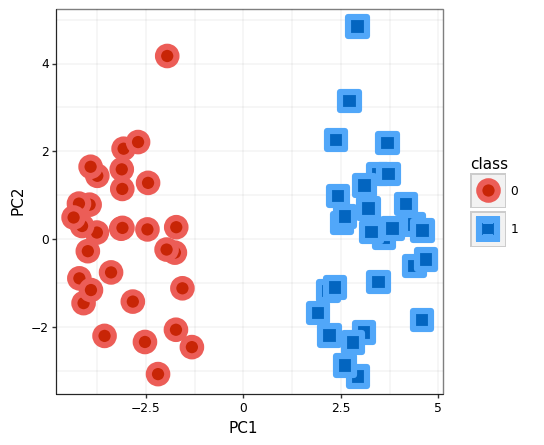

In [ ]:
fig = (
    ggplot(data = train_Z_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw()

Performing with validation set all the same operations we performed on train

In [ ]:
val_Z = val.drop(['class', 'subset'], axis = 1)

##### YOUR CODE STARTS #####
# Use scaler to standardise validation set the same way we standardised training
val_Z = scaler.transform(val_Z)
##### YOUR CODE ENDS ##### 

# Use PCA object to transform 'fitted' on training data
val_Z_new = pca_09.transform(val_Z).T

# Save the results
val_Z_new = pd.DataFrame({'PC1':np.array(val_Z_new)[0], 'PC2':np.array(val_Z_new)[1], 'class': val['class']})

Now we can train the model and test its accuracy on validation set

In [ ]:
##### YOUR CODE STARTS #####
print(f"Validation accuracy is {train_and_evaluate_with_dim(train_Z_new, val_Z_new, 2) * 100}%")
##### YOUR CODE ENDS #####

Validation accuracy is 100.0%


Wow, that is impressive, but kinda unbelievable, let's visualise! (seeing is believing)

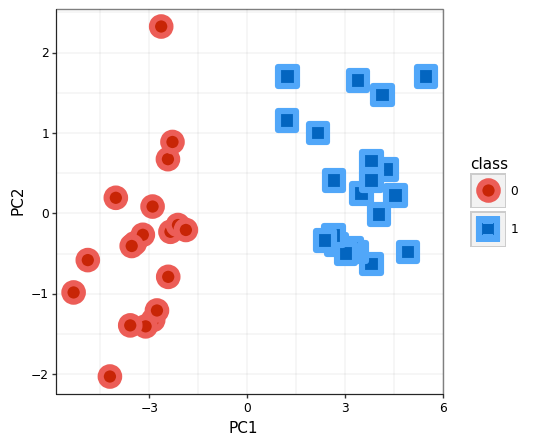

In [ ]:
fig = (
    ggplot(data = val_Z_new,
          mapping = aes(x = 'PC1', y = 'PC2')) +
    geom_point(aes(colour = 'class', 
                   shape = 'class',
                   fill = 'class'), 
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'PC1',
        y = 'PC2',
    ) +
    theme_bw() + 
    scale_color_manual(['#EC5D57', '#51A7F9']) + 
    scale_fill_manual(['#C82506', '#0365C0']) + 
    scale_shape_manual(['o', 's']) + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
).draw() 

Not bad!

### Getting our raw data back after PCA

In [ ]:
# Conventional PCA
pca = PCA() 
train_Z_compressed = pca.fit_transform(train_Z)

# Get original data back
train_Z_uncompressed = pca.inverse_transform(train_Z_compressed) 

# are the two matrices the same?
print(np.sum(np.abs(train_Z_uncompressed - train_Z)))

6.905753628037555e-12


<font color=green size=4>**Question**: What happens if we set `n_components` to let's say 0.9? What if I set it to 1.0 instead?
</font>